In [1]:
import sys
sys.path.append("/home/daria_l/src")

In [2]:
from SingleCellEval import main_function
import numpy as np
import matplotlib.pyplot as plt
import tifffile
import xml
import pandas as pd
import io
import os
import shutil
from SingleCellEval.morphology_functions import DEEPCELL_MEASURES
from SingleCellEval.intensity_functions import mean_intensity, mean_80_intensity

/home/daria_l/anaconda3/envs/cellpose/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from cellpose import models 
model_path = '/data_isilon_main/isilon_images/10_MetaSystems/MetaSystemsData/Multimodal_Imaging_Daria/_Data_Analysis/_tmp_simon/diameter_evaluation/ausschnitte/models/CP_Added'
#model_path = "CPx"
m = models.CellposeModel(model_type = model_path, gpu=True)

def read_channel_names(path):
    
    tiff = tifffile.TiffFile(path)
    omexml_string = tiff.pages[0].description
    root = xml.etree.ElementTree.parse(io.StringIO(omexml_string))
    namespaces = {'ome': 'http://www.openmicroscopy.org/Schemas/OME/2016-06'}
    channels = root.findall('ome:Image[1]/ome:Pixels/ome:Channel', namespaces)
    channel_names = [c.attrib['Name'] for c in channels]
    return channel_names

In [ ]:
base_path = "/data_isilon_main/isilon_images/10_MetaSystems/MetaSystemsData/Multimodal_Imaging_Daria"

BM_path = os.path.join(base_path, "BM")
out_path = os.path.join(base_path, "_Data_Analysis/_tmp_daria/Image_analysis/20221220_Cellpose_IFbased")
samples = os.listdir(BM_path)

for s in samples: 
    lowres_path = os.path.join(BM_path, s, "IF_IMC_lowres")
    highres_path = os.path.join(BM_path, s, "IF_cut_highres")

    lowres_image_files = os.listdir(lowres_path)

    for f in lowres_image_files:

        shutil.copyfile(os.path.join(lowres_path, f), os.path.join(out_path, "img", f))
        IMC = tifffile.imread(os.path.join(lowres_path, f))
        I = tifffile.imread(os.path.join(highres_path, f.split("IMC")[0]+"cut.tiff"))

        channel_names = read_channel_names(os.path.join(lowres_path, f))
        channel_names = pd.DataFrame({'names':channel_names})

        marker_codes = pd.read_csv(os.path.join(out_path, 'marker_codes.csv'), sep=";")
        channel_names = channel_names.replace(list(marker_codes["old_names"]), list(marker_codes["new_names"]))
        channel_names = list(channel_names['names'])

        I, masks, m_features, i_features = main_function(I, 
                                   intensity_image=IMC,
                                   cellpose_net=m,
                                   eval_kwargs={"diameter": 55}, 
                                   refine=True, t=0.12, 
                                   out_sz=None,
                                   extract_intensity_features=True, 
                                   intensity_function=mean_80_intensity,
                                   channel_names=channel_names,
                                   extract_morph_features=True,
                                   additional_morphology_functions=DEEPCELL_MEASURES,
                                   debug_msg=False)

        tifffile.imwrite(os.path.join(out_path, "masks", f), np.expand_dims(masks, axis=(0, 1, 2, 5)))
        m_features.to_csv(os.path.join(out_path, "regionprops", f.split(".")[0] + ".csv"))
        i_features.to_csv(os.path.join(out_path, "intensities", f.split(".")[0] + ".csv"))




: 

In [4]:
I = tifffile.imread("/data_isilon_main/isilon_images/10_MetaSystems/MetaSystemsData/Multimodal_Imaging_Daria/BM/20211214_18-2600_BM/IF_cut_highres/20211214_18-2600_BM_ROI_003_IF_cut.tiff")
#I = I[:int(0.1*I.shape[0]), :int(0.1*I.shape[1])]
IMC = tifffile.imread("/data_isilon_main/isilon_images/10_MetaSystems/MetaSystemsData/Multimodal_Imaging_Daria/BM/20211214_18-2600_BM/IF_IMC_lowres/20211214_18-2600_BM_ROI_003_IF_IMC.tiff")
#IMC = IMC[:, :int(0.1*IMC.shape[1]), :int(0.1*IMC.shape[2])]

channel_names = read_channel_names("/data_isilon_main/isilon_images/10_MetaSystems/MetaSystemsData/Multimodal_Imaging_Daria/BM/20211214_18-2600_BM/IF_IMC_lowres/20211214_18-2600_BM_ROI_003_IF_IMC.tiff")
channel_names = pd.DataFrame({'names':channel_names})

marker_codes = pd.read_csv('/data_isilon_main/isilon_images/10_MetaSystems/MetaSystemsData/Multimodal_Imaging_Daria/_Data_Analysis/_tmp_daria/Image_analysis/20221220_Cellpose_IFbased/marker_codes.csv', sep=";")
channel_names = channel_names.replace(list(marker_codes["old_names"]), list(marker_codes["new_names"]))
channel_names = list(channel_names['names'])
I.shape, IMC.shape

((4077, 4077), (47, 700, 700))

25.61s - Error inserting pydevd breaks.
Traceback (most recent call last):
  File "/home/daria_l/anaconda3/envs/cellpose/lib/python3.9/site-packages/debugpy/_vendored/pydevd/_pydevd_frame_eval/pydevd_modify_bytecode.py", line 328, in insert_pydevd_breaks
    for new_instruction in get_instructions_to_add(
  File "/home/daria_l/anaconda3/envs/cellpose/lib/python3.9/site-packages/debugpy/_vendored/pydevd/_pydevd_frame_eval/pydevd_modify_bytecode.py", line 102, in get_instructions_to_add
    Instr("LOAD_CONST", _pydev_stop_at_break, lineno=stop_at_line - 1),
  File "/home/daria_l/anaconda3/envs/cellpose/lib/python3.9/site-packages/debugpy/_vendored/pydevd/_pydevd_frame_eval/vendored/bytecode/instr.py", line 171, in __init__
    self._set(name, arg, lineno)
  File "/home/daria_l/anaconda3/envs/cellpose/lib/python3.9/site-packages/debugpy/_vendored/pydevd/_pydevd_frame_eval/vendored/bytecode/instr.py", line 239, in _set
    _check_lineno(lineno)
  File "/home/daria_l/anaconda3/envs/cellpose

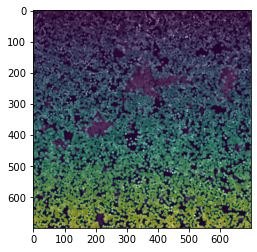

In [5]:
I, masks, m_features, i_features = main_function(I, 
                                   intensity_image=IMC,
                                   cellpose_net=m,
                                   eval_kwargs={"diameter": 55}, 
                                   refine=True, t=0.12, 
                                   out_sz=None,
                                   extract_intensity_features=True, 
                                   intensity_function=mean_80_intensity,
                                   channel_names=channel_names,
                                   extract_morph_features=True,
                                   additional_morphology_functions=DEEPCELL_MEASURES,
                                   debug_msg=True)


plt.imshow(I, cmap="gray")
plt.imshow(masks, alpha=0.5)

In [9]:
import pandas as pd
from itables import init_notebook_mode, show
init_notebook_mode(all_interactive=False)

df = pd.DataFrame(m_features)
df = df.set_index("Object")

<IPython.core.display.Javascript object>

KeyError: "None of ['labels'] are in the columns"

In [ ]:
df = pd.DataFrame(i_features)
df = df.set_index("Object")

In [26]:
import seaborn as sb

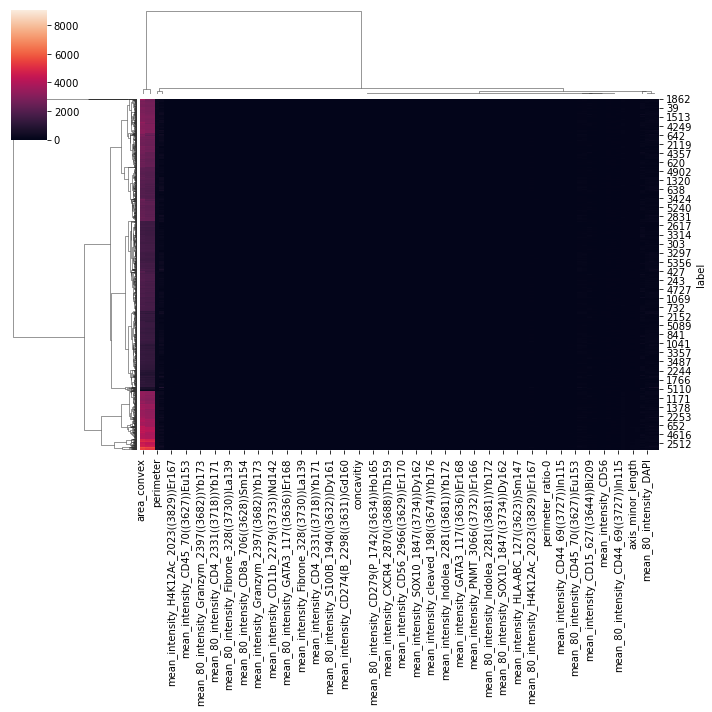

In [30]:
plt.rcParams["figure.figsize"] = 20,60

sb.clustermap(df)

In [18]:
import umap

In [19]:
emb = umap.UMAP().fit_transform(df)

<AxesSubplot:>

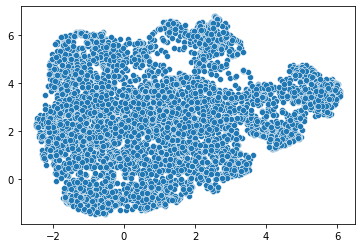

In [20]:
sb.scatterplot(x=emb[:, 0], y=emb[:,1])